# Implementations

#### Nurdaulet Mukhituly & Dasten Turlin

link to the video presentation: https://youtu.be/eLWPICTTMKE

In [2]:
from random import randint
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv

In [3]:
# pocket learning algorithm

#predicting
def pla(w, x1, x2):
    y = w[0] + w[1] * x1 + w[2] * x2
    if y < 0:
        return -1
    else:
        return 1
    
def sign(num):
    if num >= 0:
        return 1
    return -1

#pocket-pla function itself
def fit_pocketpla_function(X, Y):
    w = [0, 0, 0] 
    w_pocket = [0, 0, 0]
    pocket_errors = len(X) # some large number
    iterations = 0
    while iterations < len(X)/10:
        errors = 0
        count = 0
        while count != len(X):
            predict = pla(w, X[count][1], X[count][2])
            if sign(Y[count]) != predict:
                errors += 1
                w[0]+= sign(Y[count])
                w[1] += sign(Y[count]) * X[count][1]
                w[2] += sign(Y[count]) * X[count][2]
            count += 1
        if pocket_errors > errors:
            w_pocket[0] = w[0]
            w_pocket[1] = w[1]
            w_pocket[2] = w[2]
            pocket_errors = errors
        iterations += 1
    return w_pocket

In [4]:
#linear regression
def linear_regression(X, Y):
    x_crest = np.dot(inv(np.dot(X.T, X)), X.T)
    coefficient = np.dot(x_crest, Y)
    return coefficient

## Generating DataSet

In [5]:
def generate(size, dim):
    X = np.random.rand(size, dim)
    W = np.array([0.3, 0.9, -1.9]) # real weights
    X[:, 0] = np.ones(size)
    Y = np.dot(X, W) # adding linearity
    Y = Y.reshape(X.shape[0], 1)
    return X, Y

# adding noise as required by the exercise
def add_noise(noise, data):
    new_data = data
    if noise <= 1:
        temp = 0
        max_value = noise * len(new_data)
        while temp < max_value:
            randval = np.random.randint(0, len(new_data))
            randval %= len(data) # to make sure :)
            new_data[randval] *= -1
            temp += 1
    else:
        print("invalid noise value. should be < 1")
    return new_data

In [6]:
# plotting points
def plot_graph(X_any, Y_any):
    i = 0
    while i != len(X_any):
        if (Y_any[i] > 0):
            plt.scatter(X_any[i, 1], X_any[i,2], color = 'b')
        else:
            plt.scatter(X_any[i, 1], X_any[i,2], color = 'r')
        i += 1

In [7]:
# plotting function (either pla or linear regression)
def plot_function(X, W):  
        plt.plot(X[:, 1],-(W[0] + X[:,1]*W[1])/W[2], color = "black", label = "your function")


In [8]:
X_new, Y_new = generate(1000, 3)
Y_new = add_noise(0.1, Y_new)

In [9]:
W_pocket = fit_pocketpla_function(X_new[0:300], Y_new[0:300]) #splitting train and test data

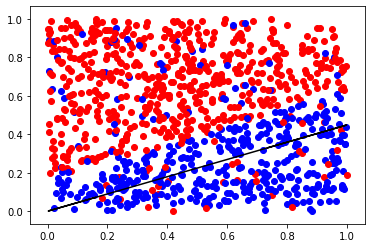

In [10]:
plot_graph(X_new, Y_new)
plot_function(X_new, W_pocket)

In [11]:
W_linear = linear_regression(X_new[0:300], Y_new[0:300])

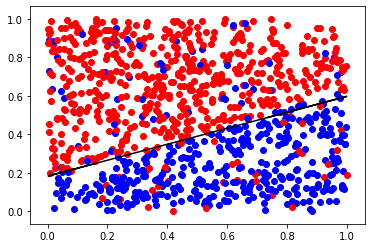

In [12]:
plot_graph(X_new, Y_new)
plot_function(X_new, W_linear)

In [13]:
#calculating error of each function
def e_test(X, Y, W):
    errors = 0
    count = 0
    while count != len(X):
        predict = pla(W, X[count][1], X[count][2])
        if sign(Y[count]) != predict:
            errors += 1
        count += 1
    return errors/len(X) 

In [390]:
e_pocket = e_test(X_new, Y_new, W_pocket)
e_linear = e_test(X_new, Y_new, W_linear)
print(e_pocket)
print(e_linear)

0.155
0.101


In [14]:
# I found how to do versus graphs in MIT's collab
def test():
    e_pocket_history = []
    e_linear_history = []
    count = 0
    while count != 100:
        X_new, Y_new = generate(1000, 3)
        Y_new = add_noise(0.1, Y_new)
        W_pocket = fit_pocketpla_function(X_new[0:300], Y_new[0:300])
        W_linear = linear_regression(X_new[0:300], Y_new[0:300])
        e_pocket = e_test(X_new, Y_new, W_pocket)
        e_linear = e_test(X_new, Y_new, W_linear)
        e_pocket_history.append(e_pocket)
        e_linear_history.append(e_linear)
        count += 1
    plt.plot(e_pocket_history)
    plt.plot(e_linear_history)
    plt.legend(('e_pocket', 'e_linear'))
    plt.xlabel('Iterations')
    plt.ylabel('E_test value')

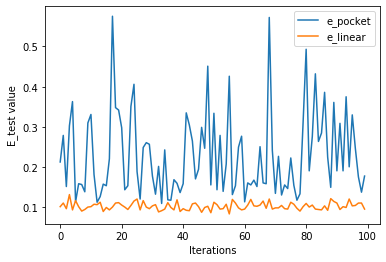

In [15]:
test()

## Conclusion

Our experiment clearly shows that the pocket algorithm is less useful than linear due to the following reasons:
1. It makes a lot of iterations
2. In the graph it shows that it performed worse in EVERY experiment
3. Pocket algorithm can be very unstable.

Theoretically, we could do a laaaaarge-number of iterations, but we are limited by our CPU and GPU.

According to the reasons above, linear regression is better in the given situation.